In [1]:
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
df = pd.read_csv("../modified_data/pol_svi_sc_merged_cleaned.csv")
df.head()

,FIPS,3/31/21,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,...,Hopefulness,Income Per Capita,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct
0,1001,6589,594.443459,55200,23315,21115,8422,1065,29372,4204,...,91.163142,26168,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365
1,1003,20505,1589.793007,208107,111945,78622,21653,4343,31203,14310,...,82.484017,28069,77.232120,80.086368,71.771566,67.272980,75.586018,66.983549,70.972246,22.409030
2,1005,2227,885.001636,25782,11937,9186,6597,918,18461,4901,...,61.927181,17249,80.375206,78.783778,73.657368,76.066481,78.753019,65.170377,68.704105,45.788173
3,1007,2542,622.461089,22527,9161,6840,2863,658,20199,2650,...,85.258871,18988,80.813736,77.837027,69.974652,75.136154,76.929754,69.859503,67.931677,20.698280
4,1009,6444,644.830460,57645,24222,20600,8220,909,22656,7861,...,79.492703,21033,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378


In [3]:
#set index to FIPS
df = df.set_index(df['FIPS'])
df= df.drop('FIPS', axis=1)

In [4]:
#rename target column
df = df.rename(columns={'3/31/21':'first_year_cases'})

In [5]:
#create variable for case% for each counties population
df['case_pct'] = df['first_year_cases']/df['E_TOTPOP']*100
df['case_pct'].head()

FIPS
1001    11.936594
1003     9.853104
1005     8.637809
1007    11.284237
1009    11.178767
Name: case_pct, dtype: float64

In [6]:
df['case_pct'].describe()

count    3058.000000
mean        9.426600
std         3.045809
min         0.000000
25%         7.713422
50%         9.466675
75%        11.176131
max        38.010657
Name: case_pct, dtype: float64

In [7]:
# bin and cut the case_pct column into 2 classifications
# q = df['case_pct'].quantile(.75)
q = df['case_pct'].quantile(.9)
bins = [0, q , 40]
labels = ['low','high']
df['case_class'] = pd.cut(df['case_pct'], bins, labels = labels)
df['case_class']

FIPS
1001      low
1003      low
1005      low
1007      low
1009      low
         ... 
56037     low
56039    high
56041     low
56043     low
56045     low
Name: case_class, Length: 3058, dtype: category
Categories (2, object): ['low' < 'high']

In [8]:
df['case_class'].value_counts()

low     2728
high     306
Name: case_class, dtype: int64

In [9]:
#drop unneeded columns
df = df.drop('case_pct', axis =1)
df

,first_year_cases,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,...,Income Per Capita,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,case_class
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,6589,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,...,26168,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,low
1003,20505,1589.793007,208107,111945,78622,21653,4343,31203,14310,40665,...,28069,77.232120,80.086368,71.771566,67.272980,75.586018,66.983549,70.972246,22.409030,low
1005,2227,885.001636,25782,11937,9186,6597,918,18461,4901,4634,...,17249,80.375206,78.783778,73.657368,76.066481,78.753019,65.170377,68.704105,45.788173,low
1007,2542,622.461089,22527,9161,6840,2863,658,20199,2650,3661,...,18988,80.813736,77.837027,69.974652,75.136154,76.929754,69.859503,67.931677,20.698280,low
1009,6444,644.830460,57645,24222,20600,8220,909,22656,7861,10233,...,21033,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,4022,10426.975730,44117,19628,15871,5237,1213,32624,2549,4721,...,30945,79.384759,79.347081,68.147062,73.938691,76.390464,67.420658,70.956334,22.894957,low
56039,3609,3996.844622,23059,13680,9158,1619,210,53703,958,3135,...,46499,71.547359,80.522872,65.399695,79.598153,79.698193,70.877600,70.938645,66.599040,high
56041,2128,2081.719807,20609,8972,7735,2552,614,27009,934,2498,...,25636,78.771570,77.859042,67.603416,69.705859,73.332067,67.404487,69.299391,16.819960,low


In [10]:
# #drop unneeded columns first_year_cases
# df = df.drop('first_year_cases', axis =1)
# df

In [11]:
#turn case % classifications into binary 
df = pd.get_dummies(df, columns = ['case_class'])
df

,first_year_cases,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,...,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,case_class_low,case_class_high
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,6589,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,...,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,1,0
1003,20505,1589.793007,208107,111945,78622,21653,4343,31203,14310,40665,...,77.232120,80.086368,71.771566,67.272980,75.586018,66.983549,70.972246,22.409030,1,0
1005,2227,885.001636,25782,11937,9186,6597,918,18461,4901,4634,...,80.375206,78.783778,73.657368,76.066481,78.753019,65.170377,68.704105,45.788173,1,0
1007,2542,622.461089,22527,9161,6840,2863,658,20199,2650,3661,...,80.813736,77.837027,69.974652,75.136154,76.929754,69.859503,67.931677,20.698280,1,0
1009,6444,644.830460,57645,24222,20600,8220,909,22656,7861,10233,...,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,4022,10426.975730,44117,19628,15871,5237,1213,32624,2549,4721,...,79.384759,79.347081,68.147062,73.938691,76.390464,67.420658,70.956334,22.894957,1,0
56039,3609,3996.844622,23059,13680,9158,1619,210,53703,958,3135,...,71.547359,80.522872,65.399695,79.598153,79.698193,70.877600,70.938645,66.599040,0,1
56041,2128,2081.719807,20609,8972,7735,2552,614,27009,934,2498,...,78.771570,77.859042,67.603416,69.705859,73.332067,67.404487,69.299391,16.819960,1,0


## RF Regressor

In [12]:
df.shape

(3058, 44)

In [13]:
# Define feature set (x)
X = df.drop(['case_class_low','case_class_high', 'first_year_cases'], axis=1).values

#Define (y)
y= df['case_class_high'].values

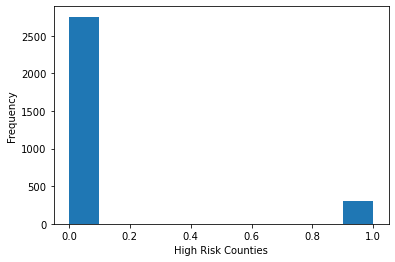

In [14]:
# frequency histogram to see how many counties are high risk and low risk
plt.hist(df["case_class_high"])
plt.xlabel("High Risk Counties")
plt.ylabel("Frequency")
plt.show()

In [15]:
#split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 ,random_state= 78) 

In [16]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2140, 41)
(918, 41)
(2140,)
(918,)


In [17]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 125, random_state = 78)

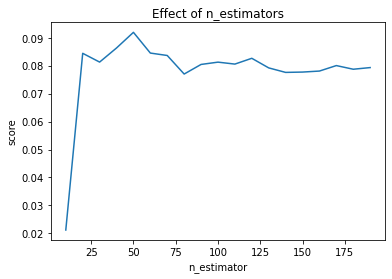

In [19]:
# Try different numbers of n_estimators 
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, y_train)
    scores.append(rf_model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [20]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [21]:
# Making predictions using the testing data.
y_pred = rf_model.predict(X_test_scaled)

In [22]:
y_pred


array([0.03684211, 0.01578947, 0.19473684, 0.24736842, 0.24210526,
       0.22105263, 0.01578947, 0.17894737, 0.61052632, 0.19473684,
       0.06315789, 0.1       , 0.29473684, 0.02631579, 0.        ,
       0.        , 0.16842105, 0.01052632, 0.01578947, 0.05789474,
       0.06842105, 0.34210526, 0.29473684, 0.18421053, 0.06315789,
       0.09473684, 0.00526316, 0.01052632, 0.07368421, 0.10526316,
       0.24210526, 0.05263158, 0.04210526, 0.31052632, 0.12105263,
       0.04736842, 0.24210526, 0.12105263, 0.15789474, 0.12105263,
       0.14736842, 0.05263158, 0.05263158, 0.16842105, 0.22631579,
       0.31578947, 0.31052632, 0.06315789, 0.08421053, 0.07368421,
       0.12631579, 0.05789474, 0.16315789, 0.05263158, 0.02631579,
       0.23684211, 0.07368421, 0.1       , 0.03684211, 0.00526316,
       0.07894737, 0.11578947, 0.02631579, 0.04210526, 0.16315789,
       0.03684211, 0.02105263, 0.02105263, 0.16315789, 0.01578947,
       0.12105263, 0.11052632, 0.26842105, 0.00526316, 0.12631

In [23]:
#mean squared error (MSE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE:", MSE)

MSE: 0.0893972202608344


In [24]:
# root mean squared error (RMSE)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",RMSE )

RMSE: 0.2989936792991357


In [25]:
# mean absolute error (MAE)
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.17922256621947022


In [26]:
# mean absolute percentage error 
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)

MAPE: 415011792287157.5


In [27]:
#accuracy 
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -415011792287057.5 %.


In [28]:
importances = rf_model.feature_importances_
importances

array([0.03682352, 0.00730631, 0.00733709, 0.00797519, 0.01105769,
       0.01680467, 0.04763307, 0.01472277, 0.01196907, 0.00732466,
       0.00973427, 0.00978134, 0.01766972, 0.02846841, 0.01651753,
       0.02334576, 0.02143909, 0.01051963, 0.03907202, 0.01481479,
       0.00973957, 0.03576548, 0.02014721, 0.02872276, 0.02471589,
       0.03797029, 0.0338265 , 0.05406437, 0.02918487, 0.0270456 ,
       0.02104094, 0.02993785, 0.04194382, 0.02702219, 0.03468972,
       0.0295106 , 0.03150998, 0.030168  , 0.02972539, 0.02626927,
       0.03668312])

In [29]:
X = df.drop(['case_class_low','case_class_high'], axis=1).columns
sorted(zip(rf_model.feature_importances_, X), reverse=True)

[(0.054064371552603546, 'Empathy'),
 (0.04763306584581084, 'E_UNEMP'),
 (0.0419438219490526, 'Hopefulness'),
 (0.03907202194590143, 'E_NOVEH'),
 (0.037970288392825, 'Conflict Awareness'),
 (0.03682351651323261, 'first_year_cases'),
 (0.036683119834563196, 'Work Ethic'),
 (0.03576548247655078, 'E_DAYPOP'),
 (0.03468971627134247, 'Neuroticism'),
 (0.03382650006663444, 'Conscientiousness'),
 (0.03150998005554947, 'Religiosity'),
 (0.030167998538043188, 'Risk Taking'),
 (0.02993784503315911, 'Gender Equality'),
 (0.02972538931851296, 'Selflessness'),
 (0.029510600450431246, 'Openness'),
 (0.02918487399508067, 'Employment Rate'),
 (0.02872275561814318, 'Belief In Science'),
 (0.028468413952026532, 'E_MINRTY'),
 (0.027045595439898696, 'Entrepreneurship'),
 (0.027022188124905443, 'Income Per Capita'),
 (0.026269265464691622, 'Tolerance'),
 (0.024715885419134758, 'Collectivism'),
 (0.023345762521348692, 'E_MUNIT'),
 (0.02143909068679382, 'E_MOBILE'),
 (0.021040939900691162, 'Extraversion'),
 (

# run the model again & drop features below .01

In [30]:
df2 = df
df2

,first_year_cases,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,...,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,case_class_low,case_class_high
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,6589,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,...,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,1,0
1003,20505,1589.793007,208107,111945,78622,21653,4343,31203,14310,40665,...,77.232120,80.086368,71.771566,67.272980,75.586018,66.983549,70.972246,22.409030,1,0
1005,2227,885.001636,25782,11937,9186,6597,918,18461,4901,4634,...,80.375206,78.783778,73.657368,76.066481,78.753019,65.170377,68.704105,45.788173,1,0
1007,2542,622.461089,22527,9161,6840,2863,658,20199,2650,3661,...,80.813736,77.837027,69.974652,75.136154,76.929754,69.859503,67.931677,20.698280,1,0
1009,6444,644.830460,57645,24222,20600,8220,909,22656,7861,10233,...,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,4022,10426.975730,44117,19628,15871,5237,1213,32624,2549,4721,...,79.384759,79.347081,68.147062,73.938691,76.390464,67.420658,70.956334,22.894957,1,0
56039,3609,3996.844622,23059,13680,9158,1619,210,53703,958,3135,...,71.547359,80.522872,65.399695,79.598153,79.698193,70.877600,70.938645,66.599040,0,1
56041,2128,2081.719807,20609,8972,7735,2552,614,27009,934,2498,...,78.771570,77.859042,67.603416,69.705859,73.332067,67.404487,69.299391,16.819960,1,0


In [31]:
# Define feature set (x) & drop low feature importances
X2 = df2.drop(['case_class_low','case_class_high', 'first_year_cases', 'E_HH', 'E_AGE17', 'E_HU', 'AREA_SQMI', 'E_AGE65','E_TOTPOP'], axis=1).values

#Define (y)
y2= df2['case_class_high'].values

In [32]:
#split data for training and testing
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.3 ,random_state= 42) 

In [33]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X2_scaler = scaler.fit(X2_train)

# Scaling the data.
X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_model_02 = RandomForestRegressor( random_state = 42)

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_model02.get_params())


Parameters currently in use:



NameError: name 'rf_model02' is not defined

In [35]:
# Try different numbers of n_estimators 
estimators = np.arange(10, 400, 10)
scores = []
for n in estimators:
    rf_model_02.set_params(n_estimators=n)
    rf_model_02.fit(X2_train, y2_train)
    scores.append(rf_model_02.score(X2_test, y2_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

KeyboardInterrupt: 

In [ ]:
rf_model_02 = rf_model_02.fit(X2_train_scaled, y2_train)

In [ ]:
# Making predictions using the testing data.
y2_pred = rf_model_02.predict(X2_test_scaled)
y2_pred

In [ ]:
#mean squared error (MSE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y2_test, y2_pred)
print("MSE:", MSE)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y2_test, y2_pred))
print("RMSE:",RMSE )

In [ ]:
# mean absolute error (MAE)
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:", metrics.mean_absolute_error(y2_test, y2_pred))

In [ ]:
# mean absolute percentage error 
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y2_test, y2_pred)
print("MAPE:", mape)

In [ ]:
#accuracy 
accuracy2 = 100 - np.mean(mape)
print('Accuracy:', round(accuracy2, 2), '%.')